# House Prices Prediction Project using machine learning
This notebook looks into all the machine learning libraries, with the goal of predicting prices of houses.

## 1. Problem definition
How can we predict the sale price of houses from the given datasets?

## 2. Data
The data is domnloaded from Kaggle dataset:https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

There are 2 main datasets:
* train.csv - the training set 
* test.csv - the test set

## 3. Evaluation
Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price.

For more on evaluation:https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/evaluation

## 4. Features
Kaggle provides a data dictionary detailing all the features of the dataset. MSSubClass: Identifies the type of dwelling involved in the sale.

In [3]:
# Import the tools we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [4]:
# Import the  training dataset
data = pd.read_csv("C:\\Users\\admin\\Desktop\\sample_project_1\\Housetrain.csv")

In [5]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

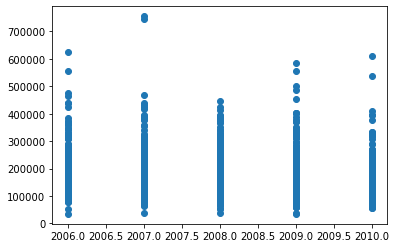

In [9]:
fig,ax = plt.subplots()
ax.scatter(data.YrSold, data.SalePrice)

In [10]:
data.shape

(1460, 81)

In [11]:
len(data)

1460

In [12]:
data.sort_values(by=["YrSold"],inplace=True,ascending=True)
data.YrSold.head()

781     2006
1219    2006
281     2006
569     2006
1220    2006
Name: YrSold, dtype: int64

In [13]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
781,782,60,RL,65.0,7153,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,175900
1219,1220,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,91500
281,282,20,FV,60.0,7200,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,New,Partial,185000
569,570,90,RL,NaN,7032,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,135960
1220,1221,20,RL,66.0,7800,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Abnorml,115000


In [14]:
data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
353,354,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,105900
1322,1323,60,RL,107.0,10186,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,190000
162,163,20,RL,95.0,12182,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,New,Partial,220000
158,159,60,FV,100.0,12552,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2010,WD,Normal,254900
1284,1285,50,RL,50.0,9638,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,169000


<AxesSubplot:ylabel='Frequency'>

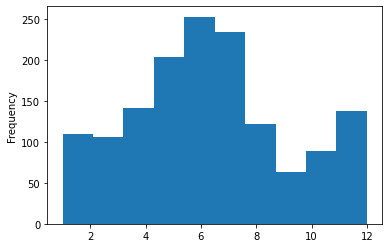

In [15]:
data.MoSold.plot.hist()

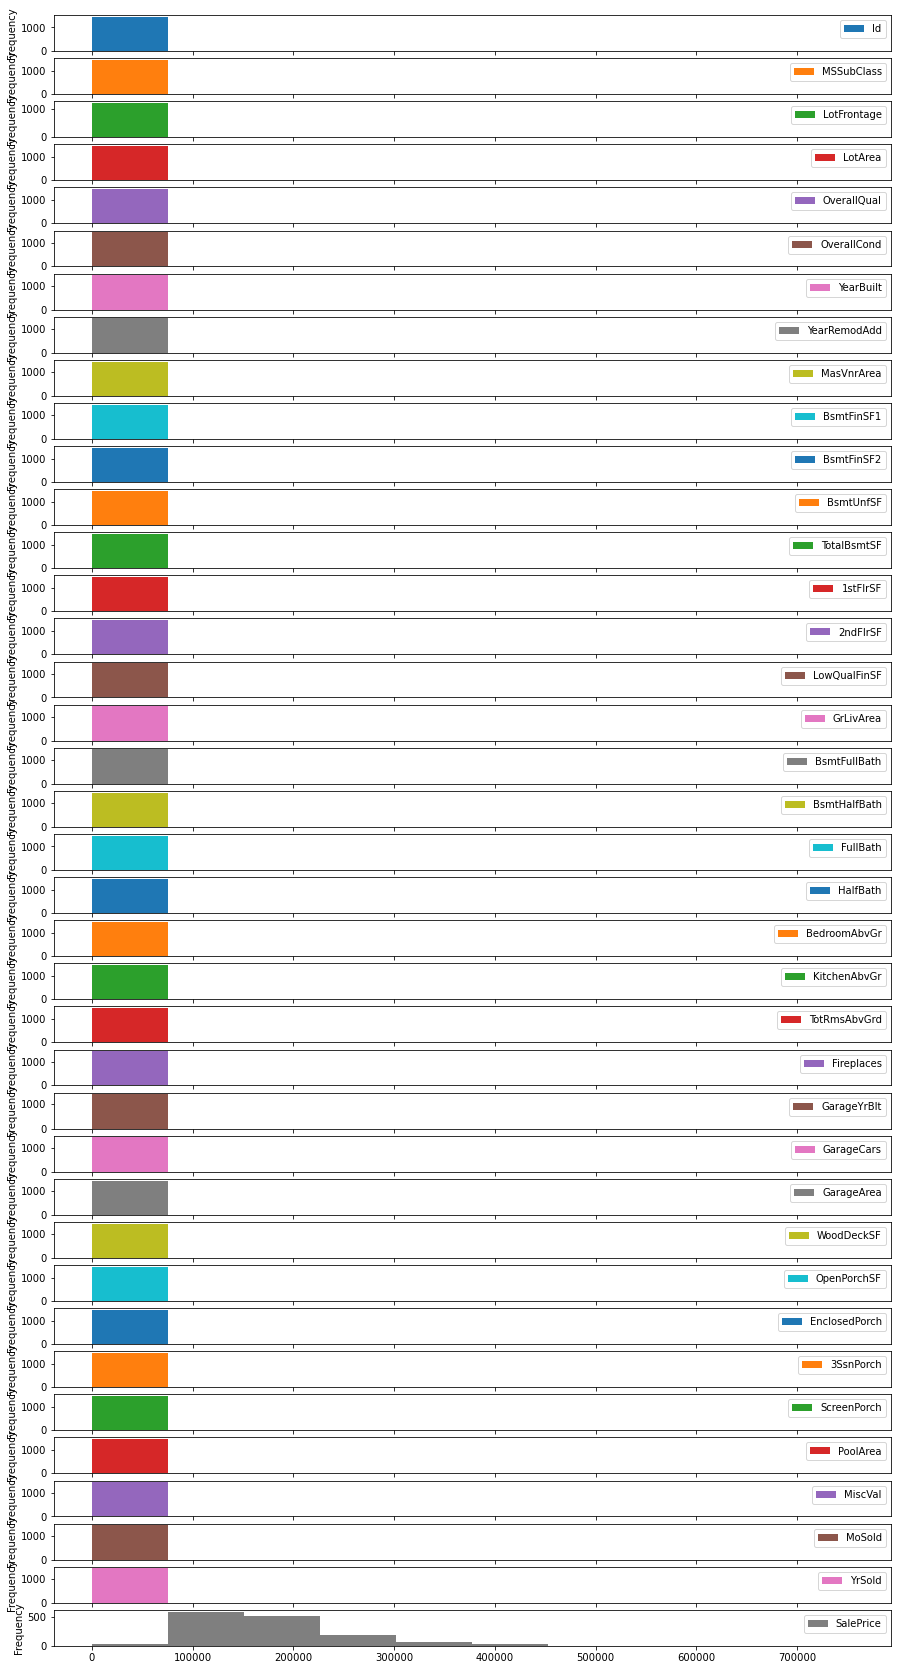

In [16]:
data.plot.hist(figsize=(15,30), subplots=True);

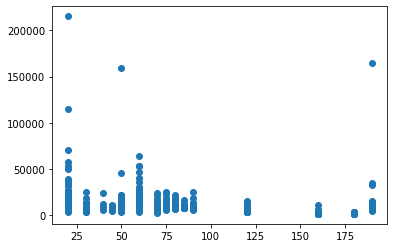

In [17]:
fig,ax = plt.subplots()
ax.scatter(data.MSSubClass, data.LotArea)

In [18]:
data.SaleType.value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [19]:
data.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
153.0      1
144.0      1
39.0       1
168.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64

In [20]:
# Make a copy of original dataframe
data_tmp = data.copy()

In [21]:
data_tmp.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
781,782,60,RL,65.0,7153,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,175900
1219,1220,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,91500
281,282,20,FV,60.0,7200,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,New,Partial,185000
569,570,90,RL,NaN,7032,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,135960
1220,1221,20,RL,66.0,7800,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Abnorml,115000
571,572,20,RL,60.0,7332,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Abnorml,120000
1223,1224,20,RL,89.0,10680,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2006,WD,Normal,137900
577,578,80,RL,96.0,11777,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Abnorml,164500
270,271,60,FV,84.0,10728,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2006,New,Partial,266000
976,977,30,RL,51.0,5900,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,8,2006,WD,Normal,85500


In [22]:
data_tmp.head().T

,781,1219,281,569,1220
Id,782,1220,282,570,1221
MSSubClass,60,160,20,90,20
MSZoning,RL,RM,FV,RL,RL
LotFrontage,65.0,21.0,60.0,NaN,66.0
LotArea,7153,1680,7200,7032,7800
...,...,...,...,...,...
MoSold,7,4,5,12,11
YrSold,2006,2006,2006,2006,2006
SaleType,WD,WD,New,WD,WD
SaleCondition,Normal,Abnorml,Partial,Normal,Abnorml


## Modelling

## Fill missing values,fill numerical values first

In [23]:
for label, content in data_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

Id
MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SalePrice


In [24]:
data_tmp.Id

781      782
1219    1220
281      282
569      570
1220    1221
        ... 
353      354
1322    1323
162      163
158      159
1284    1285
Name: Id, Length: 1460, dtype: int64

In [25]:
# Check for which numeric columns have null values
for label, content in data_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

LotFrontage
MasVnrArea
GarageYrBlt


In [26]:
# Fill numeric rows with median
for label, content in data_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing or not
            data_tmp[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median
            data_tmp[label] = content.fillna(content.median())           

In [27]:
# Check if there's  any null numeric values
for label, content in data_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [28]:
# Check to see how many examples were missing
data_tmp.LotFrontage_is_missing.value_counts()

False    1201
True      259
Name: LotFrontage_is_missing, dtype: int64

In [29]:
data.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

## Convert string to categories
One way we can turn all of our data into numbers is by converting them into pandas categories.

We can check the different datatypes compatible with pandas here: https://pandas.pydata.org/pandas-docs/stable/reference/general_utility_functions.html#data-types-related-functionality

In [30]:
data_tmp.head().T

,781,1219,281,569,1220
Id,782,1220,282,570,1221
MSSubClass,60,160,20,90,20
MSZoning,RL,RM,FV,RL,RL
LotFrontage,65.0,21.0,60.0,69.0,66.0
LotArea,7153,1680,7200,7032,7800
...,...,...,...,...,...
SaleCondition,Normal,Abnorml,Partial,Normal,Abnorml
SalePrice,175900,91500,185000,135960,115000
LotFrontage_is_missing,False,False,False,True,False
MasVnrArea_is_missing,False,False,False,False,False


In [31]:
# Find the columns which contain strings
for label, content in data_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [32]:
# This will turn all of the string value into category values
for label, content in data_tmp.items():
    if pd.api.types.is_string_dtype(content):
        data_tmp[label] = content.astype("category").cat.as_ordered()

In [33]:
data_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 781 to 1284
Data columns (total 84 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Id                      1460 non-null   int64   
 1   MSSubClass              1460 non-null   int64   
 2   MSZoning                1460 non-null   category
 3   LotFrontage             1460 non-null   float64 
 4   LotArea                 1460 non-null   int64   
 5   Street                  1460 non-null   category
 6   Alley                   91 non-null     category
 7   LotShape                1460 non-null   category
 8   LandContour             1460 non-null   category
 9   Utilities               1460 non-null   category
 10  LotConfig               1460 non-null   category
 11  LandSlope               1460 non-null   category
 12  Neighborhood            1460 non-null   category
 13  Condition1              1460 non-null   category
 14  Condition2            

In [34]:
# Check missing data
data_tmp.isnull().sum()/len(data_tmp)

Id                        0.0
MSSubClass                0.0
MSZoning                  0.0
LotFrontage               0.0
LotArea                   0.0
                         ... 
SaleCondition             0.0
SalePrice                 0.0
LotFrontage_is_missing    0.0
MasVnrArea_is_missing     0.0
GarageYrBlt_is_missing    0.0
Length: 84, dtype: float64

## Filling and turning categorical variables into numbers

In [35]:
# Check for columnswhich aren't numeric
for label, content in data_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [36]:
# Turn categorical variables into numbers and fill missing 
for label, content in data_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add a binary column to indicate whether sample had missing value or not
        data_tmp[label+"_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add +1
        data_tmp[label] = pd.Categorical(content).codes + 1

In [37]:
pd.Categorical(data_tmp["LotShape"]).codes + 1

array([4, 4, 4, ..., 4, 4, 4], dtype=int8)

In [38]:
data_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 781 to 1284
Columns: 127 entries, Id to SaleCondition_is_missing
dtypes: bool(46), float64(3), int64(35), int8(43)
memory usage: 571.7 KB


In [39]:
data_tmp.head().T

,781,1219,281,569,1220
Id,782,1220,282,570,1221
MSSubClass,60,160,20,90,20
MSZoning,4,5,2,4,4
LotFrontage,65.0,21.0,60.0,69.0,66.0
LotArea,7153,1680,7200,7032,7800
...,...,...,...,...,...
PoolQC_is_missing,True,True,True,True,True
Fence_is_missing,True,True,True,True,True
MiscFeature_is_missing,True,True,True,True,True
SaleType_is_missing,False,False,False,False,False


In [40]:
data_tmp.isna().sum()

Id                          0
MSSubClass                  0
MSZoning                    0
LotFrontage                 0
LotArea                     0
                           ..
PoolQC_is_missing           0
Fence_is_missing            0
MiscFeature_is_missing      0
SaleType_is_missing         0
SaleCondition_is_missing    0
Length: 127, dtype: int64

In [41]:
data_tmp.dtypes

Id                            int64
MSSubClass                    int64
MSZoning                       int8
LotFrontage                 float64
LotArea                       int64
                             ...   
PoolQC_is_missing              bool
Fence_is_missing               bool
MiscFeature_is_missing         bool
SaleType_is_missing            bool
SaleCondition_is_missing       bool
Length: 127, dtype: object

In [42]:
len(data_tmp)

1460

In [43]:
# Let's build a machine learning model
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
model = RandomForestRegressor(n_jobs=-1,
                             random_state=42)

# Fit the model
model.fit(data_tmp.drop("SalePrice", axis=1), data_tmp["SalePrice"])

RandomForestRegressor(n_jobs=-1, random_state=42)

In [44]:
# Score the model
model.score(data_tmp.drop("SalePrice", axis=1), data_tmp["SalePrice"])

0.981461823309125

In [45]:
# Import test dataset
data_test = pd.read_csv("Housetest.csv")

In [46]:
data_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [47]:
def preprocess_data(df):
    """
    Performs transformations on data and returns transformed data.
    """
    
    # Fill the numeric rows with median
    for label, content in data.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the data was missing or not
                data[label+"_is_missing"] = pd.isnull(content)
                # Fill missing numeric values with median
                data[label] = content.fillna(content.median())
                
                
     # Fill categorical missing data and turned categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            data[label+"_is_missing"] = pd.isnull(content)
            # We add +1 to the category code because pandas encodes missing categories
            data[label] = pd.Categorical(content).codes + 1
            
    return data  

In [48]:
# Process test data
data_test = preprocess_data(data_test)
data_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,GarageYrBlt_is_missing,GarageFinish_is_missing,GarageQual_is_missing,GarageCond_is_missing,PavedDrive_is_missing,PoolQC_is_missing,Fence_is_missing,MiscFeature_is_missing,SaleType_is_missing,SaleCondition_is_missing
781,782,60,4,65.0,7153,2,0,4,4,1,...,False,False,False,False,False,True,True,True,False,False
1219,1220,160,5,21.0,1680,2,0,4,4,1,...,True,True,True,True,False,True,True,True,False,False
281,282,20,2,60.0,7200,2,2,4,4,1,...,False,False,False,False,False,True,True,True,False,False
569,570,90,4,69.0,7032,2,0,1,4,1,...,False,False,False,False,False,True,True,True,False,False
1220,1221,20,4,66.0,7800,2,0,1,4,1,...,False,False,False,False,False,True,True,True,False,False


In [49]:
len(data_tmp)

1460

In [50]:
len(data_test)

1460

In [51]:
# Split data into X and y
X_train,y_train = data_tmp.drop("SalePrice", axis=1), data_tmp.SalePrice
X_test,y_test = data_test.drop("SalePrice", axis=1), data_test.SalePrice

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1460, 126), (1460, 126), (1460,), (1460,))

In [52]:
y_train

781     175900
1219     91500
281     185000
569     135960
1220    115000
         ...  
353     105900
1322    190000
162     220000
158     254900
1284    169000
Name: SalePrice, Length: 1460, dtype: int64

## Building an evaluation function

In [53]:
# Create evaluation function (the competition uses RMSE)
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

def rmse(y_test,y_preds):
    """ 
    Calculates root mean squared error between predictions and true labels
    """
    return np.sqrt(mean_squared_error(y_test,y_preds))

# Create functions to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    scores = {"Training MAE":mean_absolute_error(y_train, train_preds),
             "Testing MAE":mean_absolute_error(y_test,test_preds),
             "Training RMSE":rmse(y_train,train_preds),
             "Testing RMSE":rmse(y_test,test_preds),
             "Training R^2":r2_score(y_train,train_preds),
             "Testing R^2":r2_score(y_test,test_preds)}
    return scores

In [54]:
# Build a machine learning model 
model = RandomForestRegressor(n_jobs=-1,
                             random_state=42)

# Fit the model
model.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [55]:
show_scores(model)

{'Training MAE': 6485.017273972602,
 'Testing MAE': 6641.397719178082,
 'Training RMSE': 10812.7869278553,
 'Testing RMSE': 11000.877487416345,
 'Training R^2': 0.981461823309125,
 'Testing R^2': 0.9808112633148554}

## Hyperparameter tuning with RandomizedSearchCV

In [56]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators":np.arange(10,100,10),
          "max_features":[0.5,1,"auto","sqrt"],
          "max_depth":[None,3,5,10],
          "min_samples_split":np.arange(2,20,2),
          "min_samples_leaf":np.arange(1,20,2)} 

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                   random_state=42),
                                                   param_distributions=rf_grid,
                                                   cv=5,
                                                   n_iter=2,
                                                   verbose=True)

# Fit RandomizedSearchCV model
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Wall time: 4.51 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'auto',
                                                         'sqrt'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [57]:
# Find best model hyperparameters
rs_model.best_params_

{'n_estimators': 10,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 5}

In [58]:
# Evaluate the model
show_scores(rs_model)

{'Training MAE': 19861.939575472392,
 'Testing MAE': 20706.818076784377,
 'Training RMSE': 31541.372862268683,
 'Testing RMSE': 32186.972355553702,
 'Training R^2': 0.8422559772579471,
 'Testing R^2': 0.8357323738703064}

## Make prediction on test data

In [59]:
test_predict = rs_model.predict(X_test)

In [60]:
X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,GarageType_is_missing,GarageFinish_is_missing,GarageQual_is_missing,GarageCond_is_missing,PavedDrive_is_missing,PoolQC_is_missing,Fence_is_missing,MiscFeature_is_missing,SaleType_is_missing,SaleCondition_is_missing
781,782,60,4,65.0,7153,2,0,4,4,1,...,False,False,False,False,False,True,True,True,False,False
1219,1220,160,5,21.0,1680,2,0,4,4,1,...,True,True,True,True,False,True,True,True,False,False
281,282,20,2,60.0,7200,2,2,4,4,1,...,False,False,False,False,False,True,True,True,False,False
569,570,90,4,69.0,7032,2,0,1,4,1,...,False,False,False,False,False,True,True,True,False,False
1220,1221,20,4,66.0,7800,2,0,1,4,1,...,False,False,False,False,False,True,True,True,False,False


In [61]:
test_predict

array([172703.4085616 , 103718.5169489 , 194491.74466381, ...,
       232567.31949979, 240818.087591  , 157453.48880053])

In [62]:
# Format Predictions into the same format Kaggle is after
data_preds = pd.DataFrame()
data_preds["Id"] = data_test["Id"]
data_preds["SalesPrice"] = test_predict
data_preds

,Id,SalesPrice
781,782,172703.408562
1219,1220,103718.516949
281,282,194491.744664
569,570,151083.929419
1220,1221,126754.830723
...,...,...
353,354,144661.552710
1322,1323,223205.204921
162,163,232567.319500
158,159,240818.087591


In [63]:
# Export prediction data
data_preds.to_csv("test_predictions.csv",index=False)